# Machine Learning Project
# Haberman

## importing relevant libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold


Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         * 1 = the patient survived 5 years or longer
         * 2 = the patient died within 5 year
         
        
When cancer isn't detected in the lymph nodes, the test results are negative, indicating that none of the lymph nodes show signs of cancer. Conversely, if cancer cells are present in the lymph nodes, the results are considered positive. 

## Loading dataset

In [3]:
import pandas as pd

dataset = "haberman.csv"
nam = ['age_patient_operate_time', 'year_operate_time', 'axillary_node_num', 'survive_after5years']
myData = pd.read_csv(dataset, names=nam)
myData

,age_patient_operate_time,year_operate_time,axillary_node_num,survive_after5years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


Here's the typical order of operations in a machine learning project:

1. Data Collection: Gather our dataset.

2. Data Preprocessing:
    * Handle missing values (if any).
    * Encoding categorical variables (if applicable).
    * Feature engineering (if needed).
    * Scaling numerical features.<br><br>

3. Data Splitting: Split the data into training and testing sets.

4. Model Building: Choose a machine learning model and train it on the training data.

5. Model Evaluation: Evaluate the model's performance on the testing data.

6. Model Tuning: Adjust hyperparameters and make other model improvements based on evaluation results.

7. Final Model: Train the final model on the entire dataset (including training and testing data).

8. Inference: Use the final model for predictions on new, unseen data.

Source link: https://www.linkedin.com/pulse/unlock-power-machine-learning-data-science-ai-inbuiltdata-1f/

## Explore the Dataset

In [4]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age_patient_operate_time  306 non-null    int64
 1   year_operate_time         306 non-null    int64
 2   axillary_node_num         306 non-null    int64
 3   survive_after5years       306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [5]:
myData.describe()

,age_patient_operate_time,year_operate_time,axillary_node_num,survive_after5years
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## Data Preprocessing:
Since there are no missing values in our dataset and all the features are numerical, there's no need to handle missing values or encode categorical features. However, there are a few optional preprocessing steps we can consider:

## Missing values

In [6]:
import numpy as np

myData.isna().sum()

age_patient_operate_time    0
year_operate_time           0
axillary_node_num           0
survive_after5years         0
dtype: int64

## Visualization 

### Pie chart to show the percentage of survival 

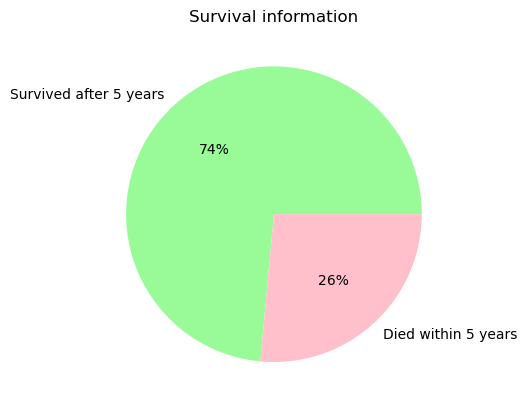

In [7]:
import matplotlib.pyplot as plt

sur = myData["survive_after5years"].value_counts()

plt.pie(x=sur, labels=["Survived after 5 years", "Died within 5 years"], colors=["#98FB98", "#FFC0CB"], autopct="%1.0f%%")
plt.title("Survival information")

plt.show()

In [8]:
myData.survive_after5years.value_counts()

survive_after5years
1    225
2     81
Name: count, dtype: int64

In this case, we can see that there is a significant class imbalance in the dataset. The class "1" has many more data points (patients who survived) compared to class "2" (patients who did not survive). Class imbalance is a common issue in machine learning, and handling it effectively is important for building accurate models. Imbalanced datasets can lead to biased model performance.

### Scatter plot to visualize the age distribution


Youngest patient was 30 old.
Oldest patient was 83 old.
Mean of the ages in patients was 52.5 years.


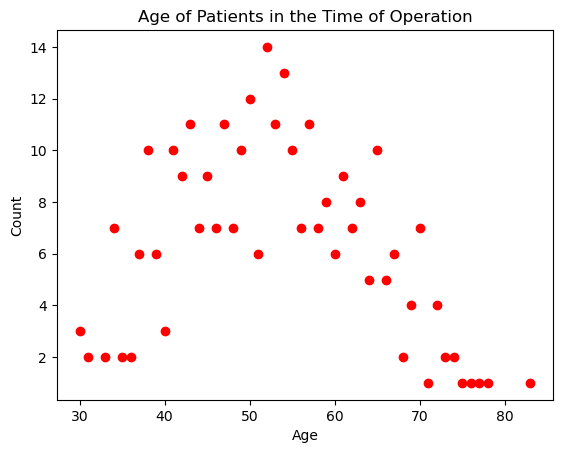

In [9]:
age = myData["age_patient_operate_time"].value_counts().sort_index()

# Extract ages (x-axis) and counts (y-axis)
ages = age.index
counts = age.values

# Create a scatter plot
plt.scatter(ages, counts, color="red")  # we can adjust the color as needed
plt.title("Age of Patients in the Time of Operation")
plt.xlabel("Age")
plt.ylabel("Count")


print(f"Youngest patient was {myData['age_patient_operate_time'].min()} old.")
print(f"Oldest patient was {myData['age_patient_operate_time'].max()} old.")
print(f"Mean of the ages in patients was {myData['age_patient_operate_time'].mean():.1f} years.")

plt.show()

### Histogram chart to visualize the count of positive nodes.

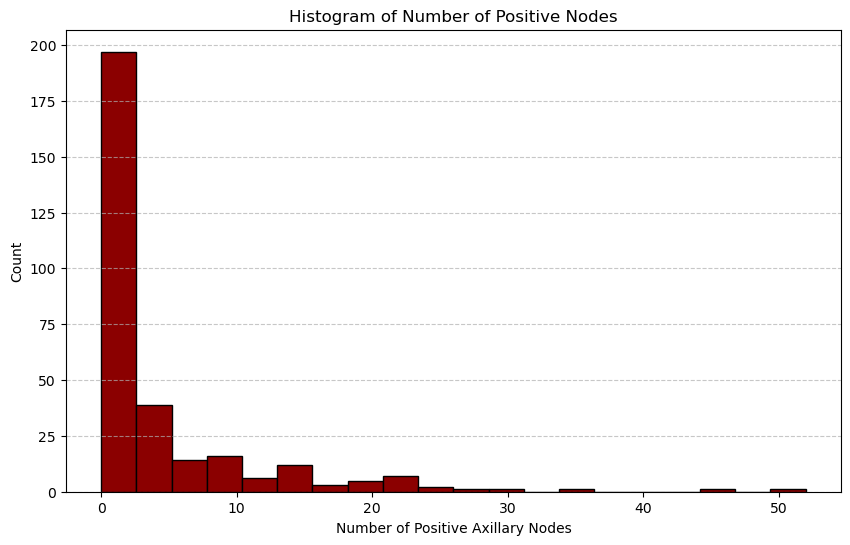

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(myData['axillary_node_num'], bins=20, color='darkred', edgecolor='black')
plt.xlabel('Number of Positive Axillary Nodes')
plt.ylabel('Count')
plt.title('Histogram of Number of Positive Nodes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Univariate analysis

Univariate analysis is like looking at one thing at a time. In this project we have "haberman" dataset with many pieces of information, where we know the age, year of operation, and the number of lymph nodes detected for different patients. When we perform univariate analysis,we're interested in just one of these pieces of information at a time.

For example let's say we want to do univariate analysis on the "age" variable. We'd focus only on the ages of the patients and see what we can learn from that one piece of information. We might do the following:

PDF (Probability Density Function): We create a chart that shows how many patients are at each age. For example, we could find that there are many patients in their 40s and 50s in the dataset, and fewer in their 30s or 70s. This gives us an idea of the distribution of ages in the data.

CDF (Cumulative Distribution Function): This chart shows us how many patients are younger or older than a specific age. For instance, we might see that about 70% of patients are younger than 60 years old. This helps us understand the cumulative distribution of ages.

Boxplot: A boxplot gives us a quick summary of the age data. It shows the median age (the middle value), the spread of ages (interquartile range), and any outliers. We can see if the ages are concentrated around a certain range or if there are outliers that represent unusual cases.

Violin Plot: This plot is like a combination of a boxplot and a PDF. It shows the distribution of ages, giving us an idea of where the ages are most concentrated and if there are multiple age "peaks" in the data.

In each of these cases, we're examining just one variable (age) to understand the patterns and characteristics of that specific variable. Univariate analysis helps us get a basic understanding of the dataset without considering the relationships between variables or the causes of certain outcomes. It's a fundamental step in data analysis to see what we have before delving into more complex analyses.

Source link: https://medium.com/aiguys/beginner-friendly-exploratory-data-analysis-on-haberman-breast-cancer-survival-dataset-4da95f314ad


### PDF(Probability Density Function)

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


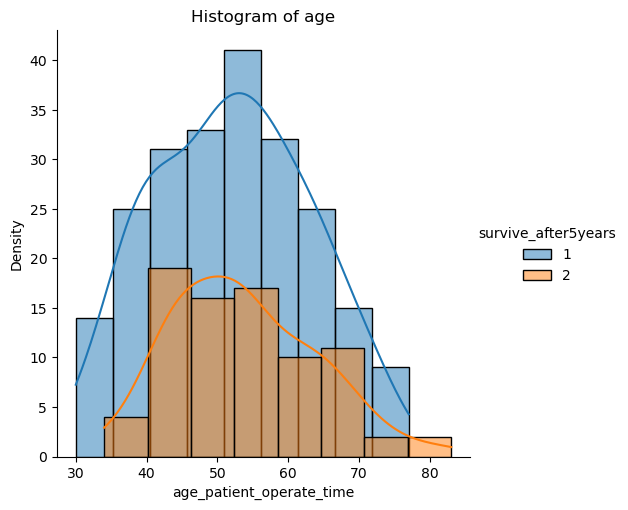

In [11]:
# visualizing how many death and survival happened in different ages

sns.FacetGrid(myData, hue="survive_after5years", height=5).map(sns.histplot, "age_patient_operate_time", kde=True).add_legend()
plt.title("Histogram of age")
plt.ylabel("Density")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


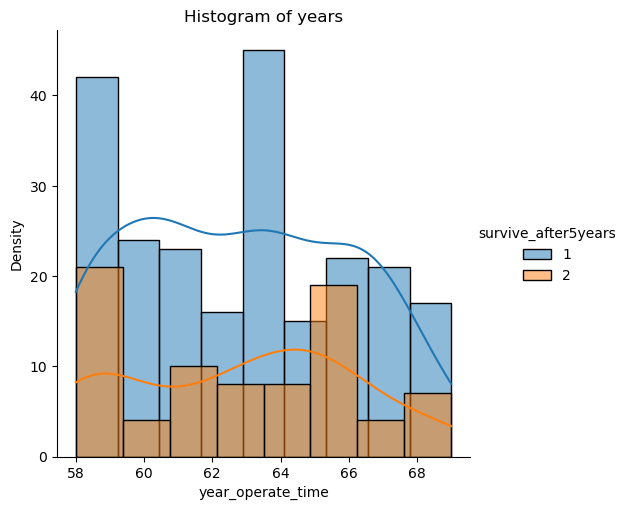

In [12]:
# visualizing how many death and survival in different years

sns.FacetGrid(myData, hue="survive_after5years", height=5).map(sns.histplot, "year_operate_time", kde=True).add_legend()
plt.title("Histogram of years")
plt.ylabel("Density")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


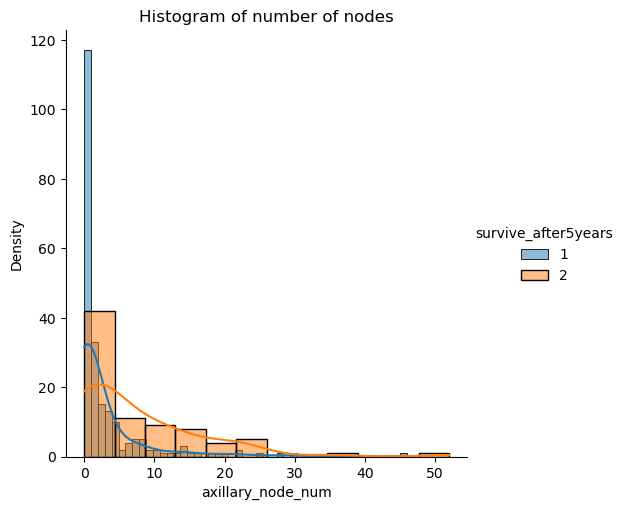

In [13]:
# visualizing how many death and survival with number of positive nudes

sns.FacetGrid(myData, hue="survive_after5years", height=5).map(sns.histplot, "axillary_node_num", kde=True).add_legend()
plt.title("Histogram of number of nodes")
plt.ylabel("Density")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

### Boxplots
The boxplot provides a statistical summary of the data as follows:

The rectangular box represents the interquartile range (IQR), with the bottom and top edges of the box corresponding to the 1st (25th percentile) and 3rd (75th percentile) quartiles, respectively.

The horizontal line inside the box represents the median (50th percentile) of the data.

These characteristics of the boxplot help visualize the central tendency, spread, and skewness of the data distribution.

Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


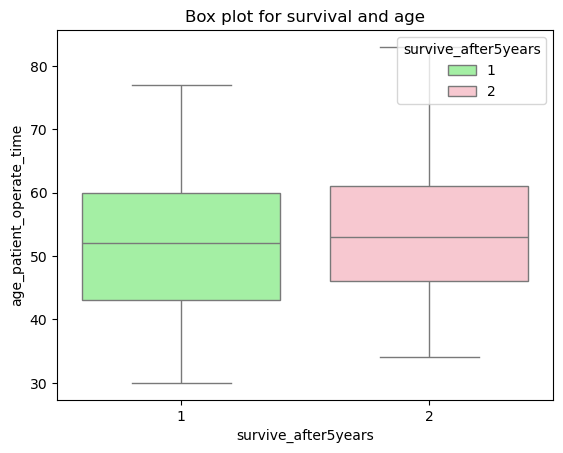

Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


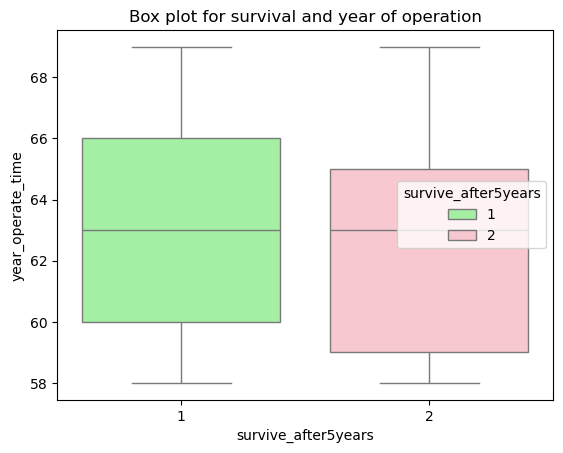

Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


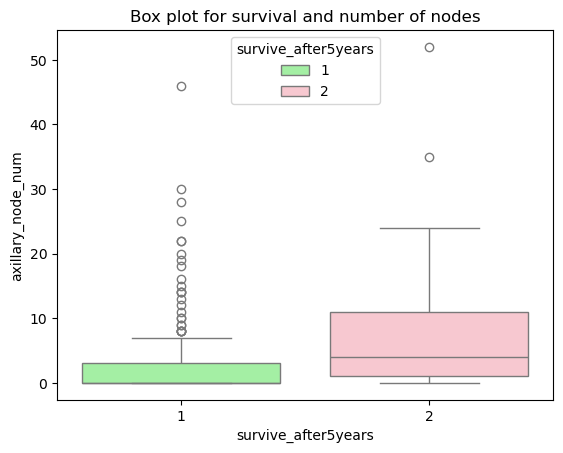

In [14]:
sns.boxplot(x = "survive_after5years", y = "age_patient_operate_time", hue = "survive_after5years", data = myData, palette= {1: "palegreen", 2: "pink"}).set_title("Box plot for survival and age")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

sns.boxplot(x = "survive_after5years", y = "year_operate_time", hue = "survive_after5years", data = myData, palette= {1: "palegreen", 2: "pink"}).set_title("Box plot for survival and year of operation")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

sns.boxplot(x = "survive_after5years", y = "axillary_node_num", hue = "survive_after5years", data = myData, palette= {1: "palegreen", 2: "pink"}).set_title("Box plot for survival and number of nodes")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

### Violin Plot

Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


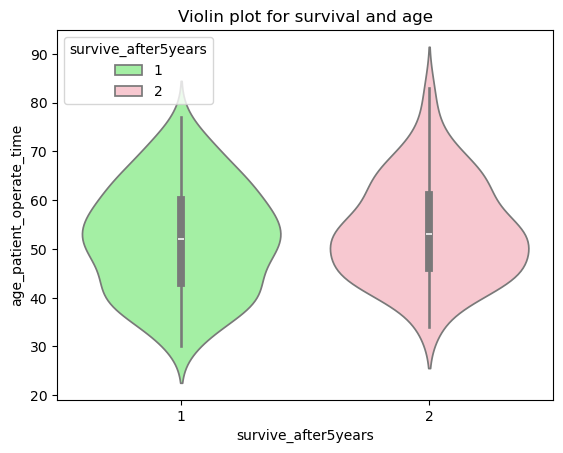

Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


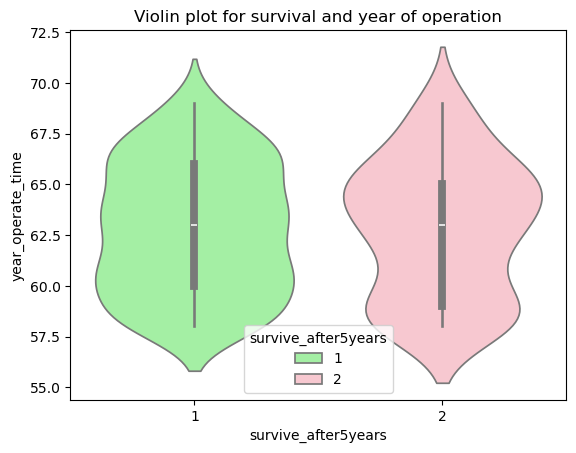

Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


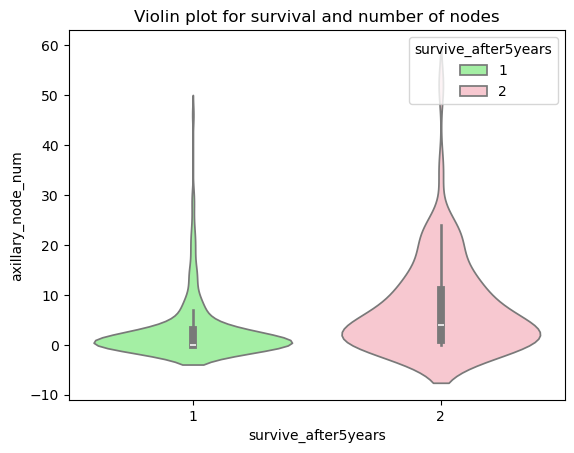

In [15]:
sns.violinplot(x = "survive_after5years", y = "age_patient_operate_time", hue = "survive_after5years", data = myData, palette= {1: "palegreen", 2: "pink"})
plt.title("Violin plot for survival and age")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

sns.violinplot(x = "survive_after5years", y = "year_operate_time", hue = "survive_after5years", data = myData, palette= {1: "palegreen", 2: "pink"})
plt.title("Violin plot for survival and year of operation")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

sns.violinplot(x = "survive_after5years", y = "axillary_node_num", hue = "survive_after5years", data = myData, palette= {1: "palegreen", 2: "pink"})
plt.title("Violin plot for survival and number of nodes")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()


## Bivariate Analysis:

Bivariate analysis is a fundamental form of quantitative statistical analysis that focuses on the examination of two variables, typically represented as X and Y. Its main purpose is to discover how these two things are connected in the real world. In simpler terms, it's about understanding how two variables relate to each other through data and numbers.

### Scatter Plot:

A scatter plot serves as a valuable visual tool for illustrating the connection between two numerical variables or attributes. Typically, it is created before diving into tasks such as calculating linear correlations or fitting regression lines. The pattern that emerges from a scatter plot reveals insights into the nature of the relationship between the two variables, whether it's linear or non-linear, and provides clues about the strength of that relationship.

Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


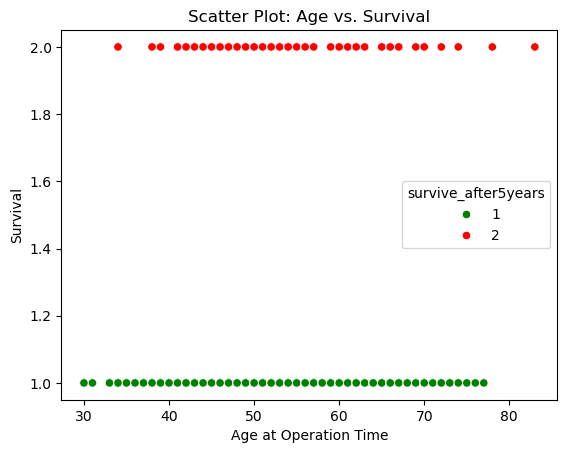

Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


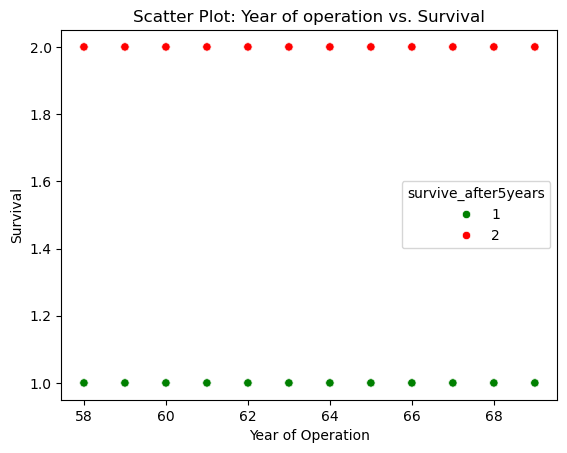

Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


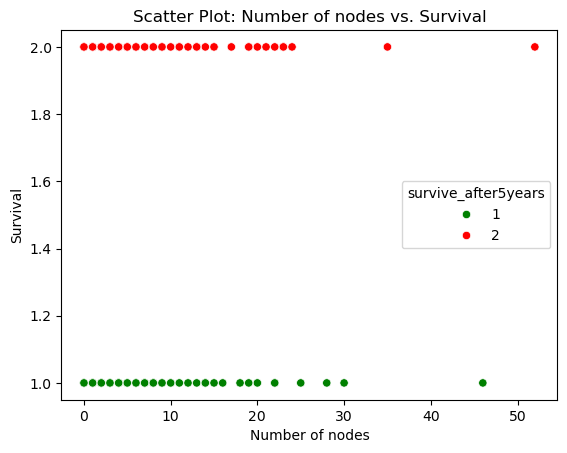

Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


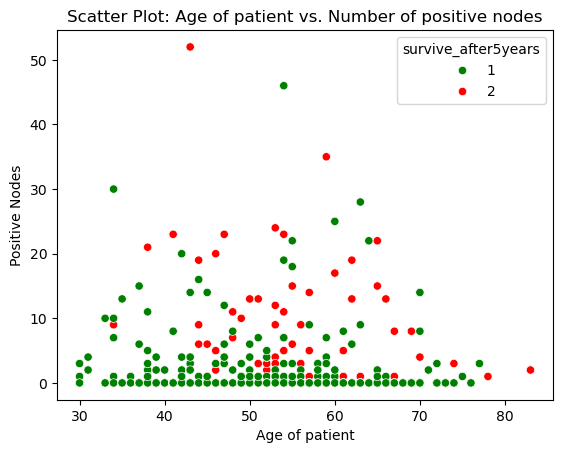

In [16]:
# Create a scatter plot
sns.scatterplot(data=myData, hue="survive_after5years", palette= {1: "green", 2: "red"}, x="age_patient_operate_time", y="survive_after5years")
plt.title("Scatter Plot: Age vs. Survival")
plt.xlabel("Age at Operation Time", color="black")
plt.ylabel("Survival")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

sns.scatterplot(data=myData, hue="survive_after5years", palette= {1: "green", 2: "red"}, x="year_operate_time", y="survive_after5years")
plt.title("Scatter Plot: Year of operation vs. Survival")
plt.xlabel("Year of Operation")
plt.ylabel("Survival")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

sns.scatterplot(data=myData, hue="survive_after5years", palette= {1: "green", 2: "red"}, x="axillary_node_num", y="survive_after5years")
plt.title("Scatter Plot: Number of nodes vs. Survival")
plt.xlabel("Number of nodes")
plt.ylabel("Survival")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

sns.scatterplot(data=myData,  hue="survive_after5years", palette= {1: "green", 2: "red"}, x="age_patient_operate_time", y="axillary_node_num")
plt.title("Scatter Plot: Age of patient vs. Number of positive nodes")
plt.xlabel("Age of patient")
plt.ylabel("Positive Nodes")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

#### Result:
It appears that the majority of patients have no detected positive lymph nodes. In this scatter plot, the green and red points are closely mixed together, making it difficult to determine a patient's survival based solely on this 2-D plot of Age of Patient and Positive nodes. To make informed decisions, we need to explore all possible combinations of features. There are three such combinations (excluding the 'Survival' class attribute), and to analyze these combinations, we employ the concept of Pair-Plot.

### Pair plot

A pair plot is like a visual cheat sheet for data. It's a way to quickly see how all the different things in our data relate to each other. It's like having a bunch of scatter plots all at once, so we can spot patterns and connections between different pieces of information. In other words, it helps us understand how everything in our data works together visually.


C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


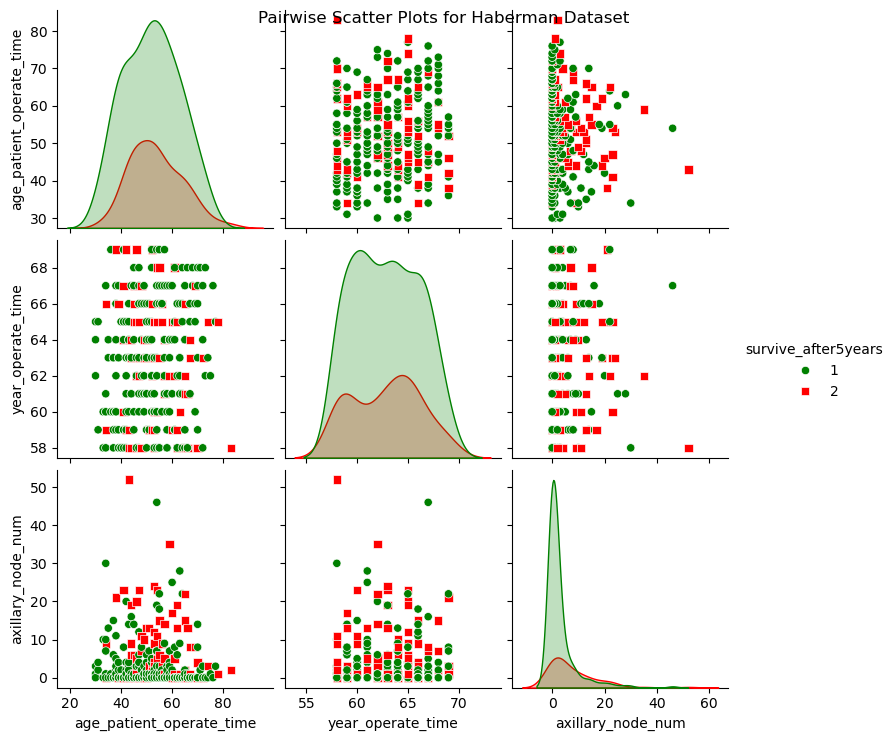

In [17]:
# Create a pairplot to visualize scatter plots for all pairs of features
sns.pairplot(myData, hue="survive_after5years", markers=["o", "s"], palette= {1: "green", 2: "red"})
plt.suptitle("Pairwise Scatter Plots for Haberman Dataset")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


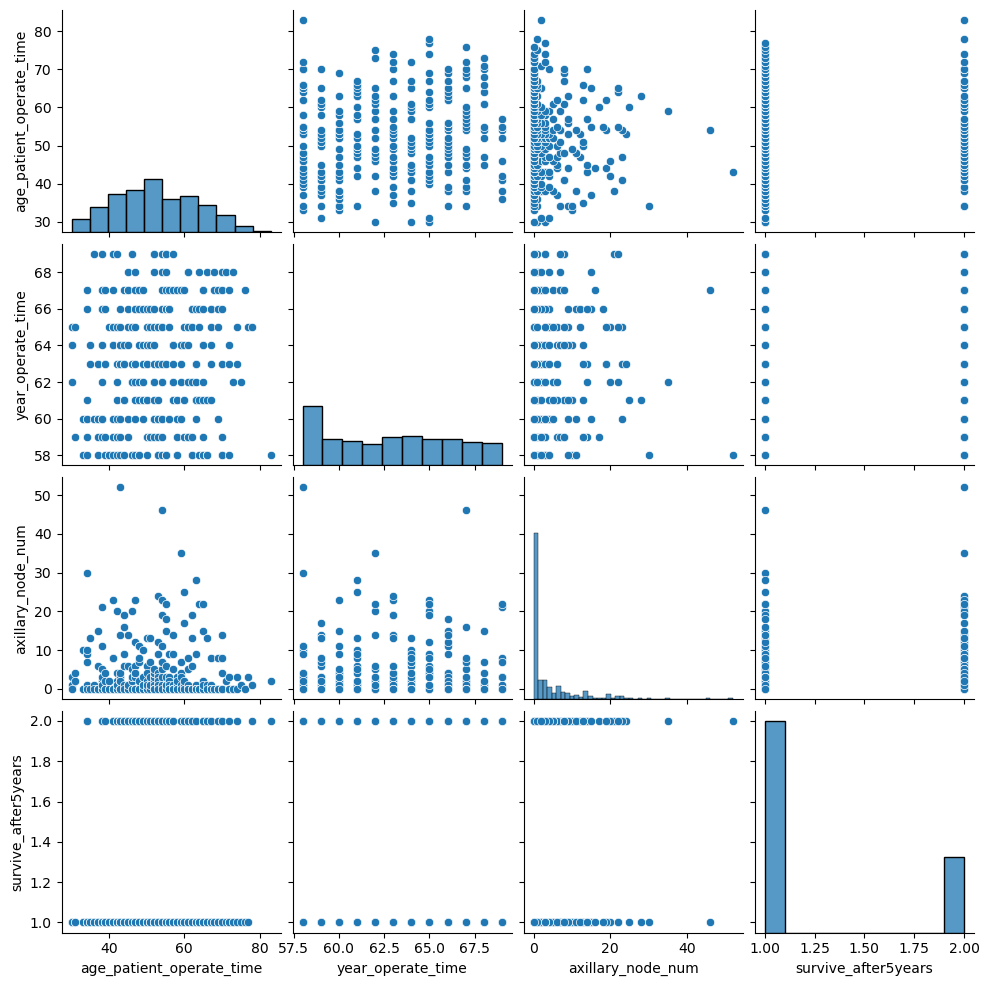

In [18]:
sns.pairplot(data=myData)
plt.show()

## Conclusion:

* The dataset we have is unbalanced, meaning it doesn't have an equal number of data points for each category or class.
* It's also not easy to draw a straight line to separate the different classes because there's a lot of overlap in the data points.
* To work with this dataset, we can't rely on simple rules like "if this, then that." Instead, we'll need to use more advanced techniques to handle the complexity of the data.
* Both Age and Operation year don't provide significant insights because their distributions are quite similar for both surviving and not survived individuals.
* The only feature that appears to be valuable in determining the survival status of patients is the number of positive lymph nodes. There's a noticeable difference in the distributions for the two groups. Notably, a significant portion of surviving patients has zero positive lymph nodes.
* When examining the distribution of years, it's apparent that the number of individuals who did not survive experiences a sudden increase and decrease between 1958 and 1960. Additionally, there's a higher number of non-survivors in the year 1965.

### Creating new data frames to show characterisitics for survived and unsurvived people


In [19]:
survived=myData.loc[myData["survive_after5years"]==1]
not_survived=myData.loc[myData["survive_after5years"]==2]

print("Characteristics of people who survived 5 years or longer:")
survived.describe()

Characteristics of people who survived 5 years or longer:


,age_patient_operate_time,year_operate_time,axillary_node_num,survive_after5years
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [20]:
print("Characteristics of people who died within 5 years:")
not_survived.describe()

Characteristics of people who died within 5 years:


,age_patient_operate_time,year_operate_time,axillary_node_num,survive_after5years
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


#### Result:
After examining both tables, it's apparent that the statistics are quite alike for most of the features, with one notable exception being positive lymph nodes.

The average number of positive lymph nodes is higher for individuals who passed away within 5 years compared to those who survived for more than 5 years.

Based on my analysis, it's reasonable to conclude that patients with more axillary nodes detected are more likely to pass away within 5 years. Therefore, individuals with fewer positive lymph nodes tend to have a better chance of survival.

## Correlation Matrix

We use a correlation matrix in the Haberman dataset to see how the different pieces of information are related. It helps us figure out if there are any connections or patterns between the features, like age, number of lymph nodes, and how long someone survives. If two things are highly correlated, it means they tend to change together. This helps us understand the data better and make informed decisions, especially in tasks like predicting whether a patient will survive or not.

,age_patient_operate_time,year_operate_time,axillary_node_num,survive_after5years
age_patient_operate_time,1.00,0.09,-0.06,0.07
year_operate_time,0.09,1.00,-0.00,-0.00
axillary_node_num,-0.06,-0.00,1.00,0.29
survive_after5years,0.07,-0.00,0.29,1.00


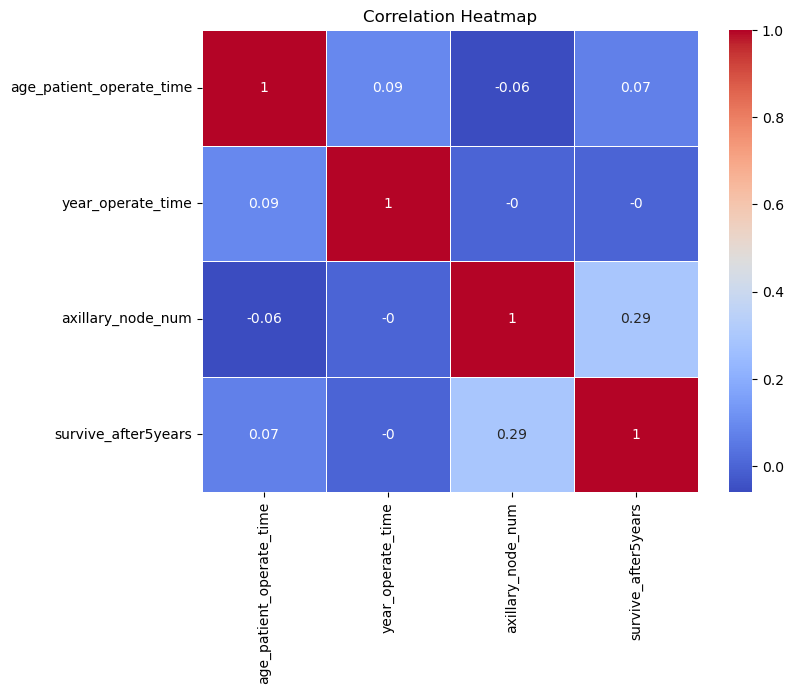

In [21]:
correlation_matrix = myData.corr().round(2)

display(correlation_matrix)

plt.figure(figsize=(8, 6))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Add a title
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()


### Result:

This matrix shows the pairwise correlations between the variables in the dataset. Each cell in the matrix represents the correlation coefficient between two variables. The correlation coefficient can range from -1 to 1, indicating the strength and direction of the relationship between variables:

    * If the correlation coefficient is close to 1, it indicates a strong positive correlation, meaning that as one variable increases, the other tends to increase as well.

    * If the correlation coefficient is close to -1, it indicates a strong negative correlation, meaning that as one variable increases, the other tends to decrease.

    * If the correlation coefficient is close to 0, it indicates a weak or no correlation between the variables.

Here's the interpretation of the correlation matrix:

1. **Age_patient_operate_time vs. Age_patient_operate_time**: The correlation between a variable and itself is always 1, indicating a perfect positive correlation, which is expected.

2. **Age_patient_operate_time vs. Year_operate_time**: The correlation coefficient is 0.09, which is relatively low. This suggests a **weak positive** correlation between a patient's age at the time of operation and the year of the operation. In other words, there is a slight tendency for older patients to have undergone surgery in more recent years.

3. **Age_patient_operate_time vs. Axillary_node_num**: The correlation coefficient is -0.06, which indicates a **very weak negative** correlation. This suggests that there is almost no relationship between a patient's age and the number of axillary nodes detected.

4. **Age_patient_operate_time vs. Survive_after5years**: The correlation coefficient is 0.07, which also indicates a **weak positive** correlation. This suggests that there is a slight tendency for older patients to have a slightly higher chance of surviving beyond five years after surgery.

5. **Year_operate_time vs. Year_operate_time**: As with the first variable, the correlation between a variable and itself is always 1.

6. **Year_operate_time vs. Axillary_node_num**: The correlation coefficient is -0.00, indicating **no significant correlation** between the year of operation and the number of axillary nodes.

7. **Year_operate_time vs. Survive_after5years**: The correlation coefficient is also -0.00, indicating **no significant correlation** between the year of operation and survival status.

8. **Axillary_node_num vs. Axillary_node_num**: As expected, the correlation between a variable and itself is 1.

9. **Axillary_node_num vs. Survive_after5years**: The correlation coefficient is 0.29, indicating a **moderate positive** correlation. This suggests that as the number of axillary nodes increases, the likelihood of not surviving beyond five years after surgery also increases.

10. **Survive_after5years vs. Survive_after5years**: The correlation between a variable and itself is always 1.

In summary, this correlation matrix provides insights into the relationships between variables in the "Haberman" dataset. Notably, **there is a weak positive correlation between patient age and the year of operation, and a moderate positive correlation between the number of axillary nodes and the likelihood of survival beyond five years after surgery. However, the correlations in this dataset are generally weak or close to zero, suggesting that these variables are not strongly interrelated.**

## Feature Scaling:

**In many cases, we may not need feature scaling for logistic regression, especially if the features are already on similar scales or if the algorithm is not sensitive to feature scaling. Logistic regression is not as sensitive to feature scaling as some other algorithms like Support Vector Machines or k-Nearest Neighbors. It is important to note that feature scaling won't always improve the model's performance significantly, and it's not a strict requirement for logistic regression. Whether or not we scale features can depend on the specific characteristics of our dataset and the behavior of our logistic regression model. As a best practice, I try both scaled and unscaled features and compare the model's performance to see if scaling provides any advantages for your particular problem, 
Depending on the machine learning algorithm we plan to use, it might be beneficial to scale our features. Feature scaling can help algorithms converge faster and perform better. Common scaling methods are Min-Max scaling (scaling features to a range of [0, 1]) and standardization (scaling features to have a mean of 0 and a standard deviation of 1). However, I noticed that including it doesn't have a significant impact on the model's performance. Therefore, I made the decision to remove it from my project.**

Feature scaling is an important thing we do before teaching computers to learn from data. It's like making sure all the numbers in our data are on the same scale. This helps our computer learn without favoring big numbers over small ones. Feature scaling is extra important when our data has numbers that cover a wide range. Let's see why feature scaling is so important and when we should use it.

1. Equalizing the Impact of Features:

Some computer programs that learn from data use measurements that involve distances, like how far apart things are. But when these measurements involve numbers that are very different, it can cause problems. For example, if one number is between 0 and 1, and another number is between 0 and 1000, the big number can have too much control over the program. Feature scaling is a way to fix this issue and make sure all the numbers have a fair say in the program's decisions.

2. Faster Convergence:

Methods that use gradients, such as gradient descent, work better when we adjust the size of ourr features. When we don't do this adjustment, the process of finding the best solution might be slower and not very steady.

3. Improved Model Performance:

Some methods, such as linear regression and K-Means clustering, can be affected by how big or small the numbers in the data are. To make these methods work better and give more accurate predictions, we can adjust the size of the numbers in the data.

4. Interpretability:

Scaling features makes it easier to understand how different features affect a model and which ones are more important. When features have very different sizes, figuring out their importance can be tricky.

When should we use feature scaling:

* If we're using algorithms that depend on measuring distances or gradient descent for improving the model (like K-Nearest Neighbors, Support Vector Machines, K-Means clustering, Principal Component Analysis).
* When our data has features with different types of measurements or units.
* When we want to improve how well our machine learning model works and how quickly it learns.
* If we're using techniques that punish large coefficient values (like L1 and L2 regularization).


Common Feature Scaling Methods:

Several common methods for feature scaling include:

1. Standardization (Z-score normalization): Rescales the data to have a mean of 0 and a standard deviation of 1. It is advantageous when the data approximates a normal distribution.

2. Min-Max Scaling: Transforms data to a specified range, often [0, 1] or [-1, 1], while preserving the original data distribution.

3. Robust Scaling: This method adjusts data by using the middle value and the range between the middle 50% of the numbers. It helps data not be affected too much by unusual or extreme numbers. When we decide how to adjust our data, think about the kind of data we have and the needs of the machine learning we're using. To make the best choice, see how adjusting the data affects our model's performance for our specific dataset and problem. For example imagine we have a list of people's salaries in a company. Some people earn really high salaries, like the CEO, while others earn average salaries. Now, if we want to find the average salary for the company, we could just add up all the salaries and divide by the number of people. But, this method can be heavily influenced by the CEO's extremely high salary. So, our average salary might not really represent what most people in the company earn. To avoid this problem, we can use a method that looks at the middle values, like the median (which is the middle number when all salaries are lined up from lowest to highest) and the range between the salaries in the middle 50% (this means the range between the 25th percentile and the 75th percentile). These middle values are less affected by extreme salaries, making our calculation more robust or resistant to these outliers.



Source link: https://towardsdatascience.com/what-is-feature-scaling-why-is-it-important-in-machine-learning-2854ae877048


# Build and Evaluate the Logistic Regression Model

In [22]:
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data Splitting
# Split the data into features (X) and the target variable (y)
X = myData.drop("survive_after5years", axis=1)
y = myData["survive_after5years"]

# Split the data into a training set and a testing set (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
# Choose a machine learning model (in our case Logistic Regression)
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [23]:
# Model Evaluation
# Make predictions on the testing data
y_pred_logistic = logistic_model.predict(X_test)

## Classification Metrics Evaluation for Logistic Model

In [24]:
# Calculate accuracy and other classification metrics
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)

# Print the results for Logistic Regression
print("\n**Logistic Regression Model Results:**\n")
print("Accuracy:", accuracy_logistic)
print("\nConfusion Matrix:")
print(conf_matrix_logistic)
print("\nClassification Report:\n")
print(class_report_logistic)



**Logistic Regression Model Results:**

Accuracy: 0.6935483870967742

Confusion Matrix:
[[40  4]
 [15  3]]

Classification Report:

              precision    recall  f1-score   support

           1       0.73      0.91      0.81        44
           2       0.43      0.17      0.24        18

    accuracy                           0.69        62
   macro avg       0.58      0.54      0.52        62
weighted avg       0.64      0.69      0.64        62



### Confusion matrix Explanation:

Positive means Correctly<br>
Negative means Incorrectly

If Survived is our True value and Died is our False vlaue, then:
##### [[TP: Positive predicted Survived;   FN: Negative predicted Died]
##### [TN: Negative predicted Survived;   FP: Positive predicted Died]]<br>


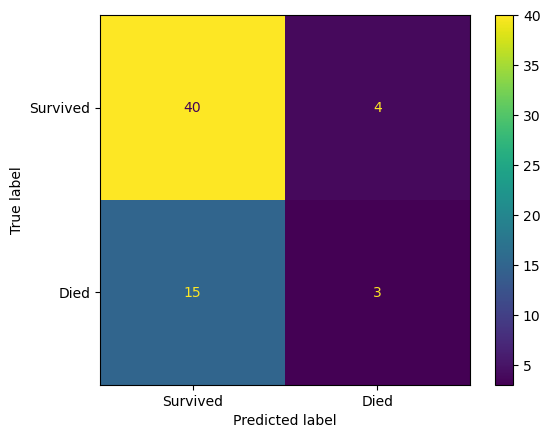

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

cm_display_logistic = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_logistic, display_labels=["Survived", "Died"])
cm_display_logistic.plot()


## Logistic Regression model Results:

Model Evaluation Metrics:

**Accuracy**: The model achieved an accuracy of approximately 69.35%, indicating that it correctly classified 69.35% of cases in the test dataset.


**Confusion Matrix**:

For Survived =><br>
True Positives (TP): 40<br>
True Negatives (TN): 15<br>
False Positives (FP): 3<br>
False Negatives (FN): 4<br>
Precision survived => 40/(40 + 15) = 0.73  [correctly predicted survived/(correctly predicted survived + Incorrectly predicted survived)]<br>

For Died => <br>
True Positives (TP): 3<br>
True Negatives (TN): 40<br>
False Positives (FP): 4<br>
False Negatives (FN): 15<br>
Precision Died => 3/(3 + 4) = 0.43 [correctly predicted died/(correctly predicted died + Incorrectly predicted died)]<br>

Source link: https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9826726

**Precision**: Precision measures the ratio of correctly predicted positive observations (TP) to the total predicted positive observations (TP + FP). In this case, precision is higher for class "1" (patients who survived for 5 years or longer), indicating that when the model predicts a patient to survive, it is correct 73% of the time. In simpler terms, if the model says a patient will survive, there's a 73% chance that the model is right. A high precision in this context is crucial because it means that the model doesn't make many false positive predictions. It's like the doctor making sure they're really accurate when they say a patient will be fine. In medical applications, high precision is valuable because it minimizes the chances of telling a patient they will survive when they won't. It's about being trustworthy and accurate when making positive predictions, which can have a significant impact on patient care and decisions.

**Recall**: Recall assesses the ratio of correctly predicted positive observations (TP) to all observations in the actual class (TP + FN). In this case, recall is higher for class "1," suggesting that the model excels at identifying patients who actually survived. Recall for "class 1" answers the following question: "Out of all the patients who actually survived for 5 years or longer (the true members of 'class 1'), how many did our model correctly identify?" In other words, recall tells us how good our model is at capturing or "recalling" the patients who truly survived for a long time. It's like counting how many people the model correctly recognizes as the ones who had a positive outcome, in this case, surviving for 5 years or more. Now, let's move to "class 2." Recall for "class 2" addresses a similar question: "Out of all the patients who unfortunately died within 5 years (the true members of 'class 2'), how many did our model correctly identify?" For "class 2," recall helps us understand how well the model can identify individuals who experienced a negative outcome, which, in this context, means not surviving for 5 years.
Here's why it's important: A high recall value indicates that the model is good at finding the individuals who truly belong to a particular class, whether it's the "survived" class or the "not survived" class. In our case, we mentioned that recall is higher for "class 1," which means that the model is better at identifying patients who actually survived for 5 years or longer. It excels at capturing those positive cases. However, for "class 2," recall is lower, suggesting that the model is not as good at identifying patients who did not survive within 5 years. It might miss some of the negative cases. This information is valuable because it helps us understand the strengths and weaknesses of our model in differentiating between these two classes, which is essential when dealing with medical data and making predictions about patient outcomes.

**F1-Score**: The F1-score represents the harmonic mean of precision and recall, providing a balanced measure between the two. For class "1," the F1-score is higher, signifying that the model is relatively better at classifying patients who survived. The F1-score is a single number that tells us how well our model is performing when it comes to classifying things into different groups or categories. In this context, it helps us measure the model's performance in deciding whether patients survived or not. 

The F1 score can range from 0 to 1, with higher values indicating better model performance. Here's how to interpret F1 scores: **High F1 Score**: An F1 score closer to 1 indicates that the model is doing well in both precision and recall. It means the model is achieving a good balance between making accurate positive predictions and not missing many positive cases. In other words, it's a sign of a well-balanced and effective model. **Low F1 Score**: An F1 score closer to 0 indicates that the model is not performing well in either precision or recall, or both. It suggests that the model might be making many mistakes when predicting positive cases or missing a significant number of actual positive cases. In this case, the model's performance is considered poor.


**Support**: Support indicates the number of occurrences of each class in the actual dataset. Support simply tells us how many times each class appears in the actual dataset. In our case, we have two classes: "class 1," which represents patients who survived for 5 years or longer, and "class 2," which represents patients who did not survive within 5 years. Support tells us how many patients belong to each of these two classes in the haberman dataset.

**Macro Avg**: The macro average is computed as the average of precision, recall, and F1-score for **both classes**. In this case, it's lower due to class "2" having lower precision, recall, and F1-score.

**Weighted Avg**: The weighted average considers the imbalance in class distribution, offering a more comprehensive representation of overall model performance. In this case, it's highest for class "1," which is the primary class of interest. The weighted average is similar to the macro average, but it considers the fact that there might be more data for one class than the other. In our dataset, "class 1" (patients who survived for 5 years or longer) appears more frequently. So, the weighted average takes into account the fact that one class is more dominant. It gives higher importance to the class with more data because it's the primary class of interest. In our case, "class 1" has the highest weighted average because it's the class you are particularly concerned about when making predictions.

Source link: https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/

**Summary**:

Based on these metrics, the model performs better in predicting patients who survived for 5 years or longer (class "1") compared to those who did not survive (class "2"). However, there is room for improvement, especially in correctly identifying patients who did not survive, as evidenced by the lower recall and F1-score for class "2."

To enhance the model's performance, consider further model tuning, experimenting with different algorithms, or exploring additional feature engineering techniques, particularly for class "2" (patients who did not survive within 5 years). Addressing the class imbalance may also be advantageous for improving overall model performance.

## Cross-Validation for evaluating Logistic Model

In [39]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold


# Perform 5-fold cross-validation (we can change the number of folds if needed)
scores = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.75806452 0.75409836 0.72131148 0.75409836 0.75409836]
Mean Accuracy: 0.7483342147012163


#### We can also get cross-validated predictions and performance metrics for each fold:

In [40]:
# Perform cross-validation with predictions
y_pred_cv = cross_val_predict(logistic_model, X, y, cv=5)

# Compute performance metrics for each fold
for i, (train, test) in enumerate(StratifiedKFold(n_splits=5).split(X, y)):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Fold {i + 1} - Accuracy: {accuracy}")
    print(f"Fold {i + 1} - Confusion Matrix:\n{confusion}")
    print(f"Fold {i + 1} - Classification Report:\n{report}")

Fold 1 - Accuracy: 0.7580645161290323
Fold 1 - Confusion Matrix:
[[44  1]
 [14  3]]
Fold 1 - Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.98      0.85        45
           2       0.75      0.18      0.29        17

    accuracy                           0.76        62
   macro avg       0.75      0.58      0.57        62
weighted avg       0.76      0.76      0.70        62

Fold 2 - Accuracy: 0.7540983606557377
Fold 2 - Confusion Matrix:
[[44  1]
 [14  2]]
Fold 2 - Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.98      0.85        45
           2       0.67      0.12      0.21        16

    accuracy                           0.75        61
   macro avg       0.71      0.55      0.53        61
weighted avg       0.73      0.75      0.69        61

Fold 3 - Accuracy: 0.7213114754098361
Fold 3 - Confusion Matrix:
[[42  3]
 [14  2]]
Fold 3 - Classification Report

# Build SVM Model

In [ ]:
from sklearn.svm import SVC

# SVM Model
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

## Classification Metrics Evaluation for SVM Model

In [30]:
# Calculate accuracy and other classification metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Print the results for SVM
print("\n**SVM Model Results:**\n")
print("Accuracy:", accuracy_svm)
print("\nConfusion Matrix:")
print(conf_matrix_svm)
print("\nClassification Report:\n")
print(class_report_svm)



**SVM Model Results:**

Accuracy: 0.6935483870967742

Confusion Matrix:
[[43  1]
 [18  0]]

Classification Report:

              precision    recall  f1-score   support

           1       0.70      0.98      0.82        44
           2       0.00      0.00      0.00        18

    accuracy                           0.69        62
   macro avg       0.35      0.49      0.41        62
weighted avg       0.50      0.69      0.58        62



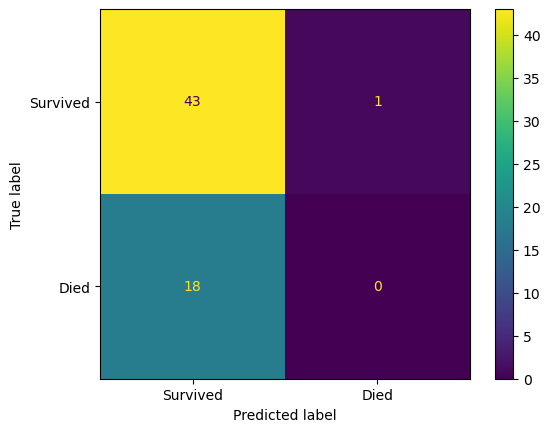

In [31]:
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=["Survived", "Died"])
cm_display_svm.plot()

## SVM Model Results:

**Accuracy**: 0.6935 (69.35%): 

This is the overall accuracy of the SVM model. It tells us that the model correctly predicted the class labels for approximately 69.35% of the total data points.

**Confusion Matrix**:

For Survived =><br>
True Positives (TP): 43<br>
True Negatives (TN): 18<br>
False Positives (FP): 0<br>
False Negatives (FN): 1<br>
Precision survived => 43/(43 +18) = 0.70[correctly predicted survived/(correctly predicted survived + Incorrectly predicted survived)]

For Died =><br>
True Positives (TP): 0<br>
True Negatives (TN): 43<br>
False Positives (FP): 1<br>
False Negatives (FN): 18<br>
Precision Died => 0/(0 + 1) = 0 [correctly predicted died/(correctly predicted died + Incorrectly predicted died)]


**Classification Report**:

**Precision**: Precision measures how many of the predicted positive instances were actually positive. For class 1, precision is 0.70, which means that 70% of the instances predicted as class 1 were actually class 1. However, for class 2, precision is 0.00, indicating that none of the instances predicted as class 2 were actually class 2.

**Recall**: Recall (or sensitivity) measures how many of the actual positive instances were correctly predicted as positive by the model. For class 1, recall is 0.98, indicating that 98% of the actual class 1 instances were correctly identified. However, for class 2, recall is 0.00, indicating that none of the actual class 2 instances were correctly identified.

**F1-Score**: The F1-score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall. For class 1, the F1-score is 0.82, and for class 2, it is 0.00.

**Support**: Support is the number of instances in each class. There are 44 instances of class 1 and 18 instances of class 2.

**Accuracy (repeated)**: The overall accuracy is calculated as the percentage of correctly classified instances, which is 0.69 (or 69%).

**Macro Avg**: This is the average of precision, recall, and F1-score across both classes. In this case, the macro-averaged precision is 0.35, recall is 0.49, and F1-score is 0.41.

**Weighted Avg**: This is the weighted average of precision, recall, and F1-score, where each class's score is weighted by its support. In this case, the weighted-averaged precision is 0.50, recall is 0.69, and F1-score is 0.58.

Overall, this SVM model seems to perform well in terms of accuracy for class 1, but it performs poorly for class 2. The low recall and F1-score for class 2 suggest that the model has difficulty correctly identifying instances of class 2, possibly due to class imbalance or other factors. Further analysis and model tuning may be necessary to improve the model's performance, especially for class 2.






## Cross-Validation for evaluating SVM Model

# Build K-Nearest Neighbors Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

## Classification Metrics Evaluation for K-Nearest Neighbors Model

In [33]:
# Calculate accuracy and other classification metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Print the results for K-Nearest Neighbors
print("K-Nearest Neighbors Model Results:")
print("Accuracy:", accuracy_knn)
print("\nConfusion Matrix:")
print(conf_matrix_knn)
print("\nClassification Report:\n")
print(class_report_knn)


K-Nearest Neighbors Model Results:
Accuracy: 0.6612903225806451

Confusion Matrix:
[[38  6]
 [15  3]]

Classification Report:

              precision    recall  f1-score   support

           1       0.72      0.86      0.78        44
           2       0.33      0.17      0.22        18

    accuracy                           0.66        62
   macro avg       0.53      0.52      0.50        62
weighted avg       0.61      0.66      0.62        62



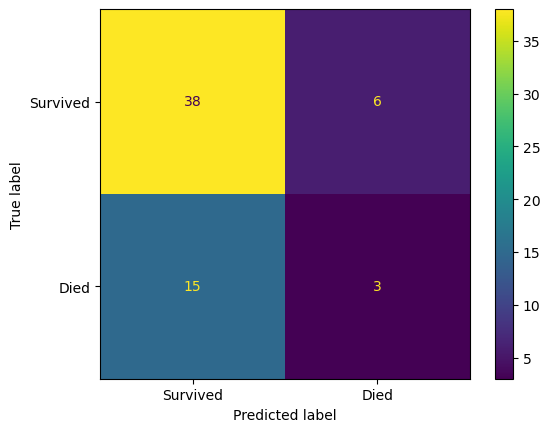

In [34]:
cm_display_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn, display_labels=["Survived", "Died"])
cm_display_knn.plot()

## K-Nearest Neighbors Model Results:

**Accuracy**: The accuracy of the model is 0.6613, which means that it correctly classified 66.13% of the total instances in the dataset.

**Confusion Matrix**:

For Survived =><br>
True Positives (TP): 38<br>
True Negatives (TN): 15<br>
False Positives (FP): 3<br>
False Negatives (FN): 6<br>
Precision survived => 38/(38 +15) = 0.72 [correctly predicted survived/(correctly predicted survived + Incorrectly predicted survived)]

For Died =><br>
True Positives (TP): 3<br>
True Negatives (TN): 38<br>
False Positives (FP): 6<br>
False Negatives (FN): 15<br>
Precision Died => 3/(3 + 6) = 0.33 [correctly predicted died/(correctly predicted died + Incorrectly predicted died)]

**Classification Report**:

**Precision**: Precision measures how many of the predicted positive instances were actually positive. For class 1, precision is 0.72, meaning that 72% of the instances predicted as class 1 were actually class 1. For class 2, precision is 0.33, indicating that 33% of the instances predicted as class 2 were actually class 2.

**Recall**: Recall (or sensitivity) measures how many of the actual positive instances were correctly predicted as positive by the model. For class 1, recall is 0.86, indicating that 86% of the actual class 1 instances were correctly identified. For class 2, recall is 0.17, meaning that only 17% of the actual class 2 instances were correctly identified.

**F1-Score**: The F1-score is the harmonic mean of precision and recall, providing a balance between the two. For class 1, the F1-score is 0.78, and for class 2, it is 0.22.

**Support**: Support represents the number of instances in each class. There are 44 instances of class 1 and 18 instances of class 2.

**Accuracy**: The overall accuracy is calculated as the percentage of correctly classified instances, which is 0.66 (or 66%).

**Macro Avg**: This is the average of precision, recall, and F1-score across both classes. In this case, the macro-averaged precision is 0.53, recall is 0.52, and F1-score is 0.50.

**Weighted Avg**: This is the weighted average of precision, recall, and F1-score, where each class's score is weighted by its support. In this case, the weighted-averaged precision is 0.61, recall is 0.66, and F1-score is 0.62.

In summary, the K-NN model has an accuracy of 66.13%, which means it correctly classifies about two-thirds of the instances. However, the model has a relatively low recall for class 2, which suggests that it has difficulty correctly identifying instances of class 2. The F1-score for class 2 is also low, indicating that the model's performance is not well-balanced between the two classes. Further analysis and potential model tuning may be necessary to improve the performance, especially for class 2.



## Cross-Validation for evaluating K-Nearest Neighbors Model

# Compare my three machine learning models (Logistic Regression, SVM, and K-Nearest Neighbors) models and find the best one:

### 1. Compare them in terms of accuracy, confusion matrix, and classification report:

**Accuracy**: Both the Logistic Regression and SVM models have the highest accuracy (69.35%), while K-Nearest Neighbors lags slightly behind (66.13%).

**Confusion Matrix**:
* The Logistic Regression model has a slightly better balance in the confusion matrix, with fewer false positives and false negatives.
* The SVM model has a higher number of true positives but has no true negatives for the second class, resulting in zero recall for class 2.
* The K-Nearest Neighbors model performs somewhat similar to Logistic Regression but has more false positives.

**Classification Report**:
* In terms of precision, recall, and F1-score, the Logistic Regression model performs better for both classes compared to the other models.
* The SVM model has low recall for class 2, resulting in low F1-score for this class.
* The K-Nearest Neighbors model has lower precision and recall for both classes.

Based on the analysis, it seems that the Logistic Regression model outperforms the SVM and K-Nearest Neighbors models in terms of accuracy, precision, recall, and F1-score for both classes. Therefore, the Logistic Regression model appears to be the best choice for the "Haberman" dataset classification task.


### 2. Compare them in terms of Cross-Validation:













## Conclusion
In summary, the report concludes that the Logistic Regression model is the most suitable for this dataset, achieving the highest overall performance in terms of accuracy and various evaluation metrics.


